# Phase 2.1: Logging Artifacts (Files) with MLflow

This comprehensive notebook demonstrates:
1. **Logging Plots** - Save matplotlib visualizations
2. **Logging CSV Files** - Store data files
3. **Logging JSON Configs** - Save configuration files
4. **Logging Directories** - Store multiple files at once
5. **Logging Binary Files** - Save pickle files

## What are Artifacts?

**Artifacts** are any files you want to save alongside your ML experiment. Think of them as "attachments" to your experiment run. Common examples include:
- Plots and visualizations (PNG, PDF)
- Data files (CSV, JSON)
- Model files (pickle, joblib)
- Configuration files
- Text reports and notes

## Learning Goals
- Understand what artifacts are and why they matter
- Learn to log different file types to MLflow
- Know the difference between `log_artifact()` and `log_artifacts()`
- View artifacts in the MLflow UI

## Step 1: Import Libraries

Let's import all the libraries we need for this tutorial.

In [1]:
# mlflow: The main library for experiment tracking
import mlflow

# matplotlib: For creating plots and visualizations
import matplotlib.pyplot as plt

# pandas: For creating and manipulating data tables (DataFrames)
import pandas as pd

# numpy: For numerical operations and random number generation
import numpy as np

# json: For creating and saving JSON configuration files
import json

# os: For file and directory operations
import os

# shutil: For cleaning up directories
import shutil

# pickle: For saving Python objects as binary files
import pickle

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")
print("Ready to learn about artifact logging!")

All libraries imported successfully!
Ready to learn about artifact logging!


## Step 2: Connect to MLflow

Before we can log anything, we need to connect to our MLflow tracking server and set up an experiment.

**Key Concepts:**
- **Tracking URI**: The address where MLflow server is running
- **Experiment**: A named collection of runs (like a folder for related experiments)

In [2]:
# Get the MLflow tracking server URL from environment variable
# If not set, default to localhost:5000
TRACKING_URI = os.getenv("MLFLOW_TRACKING_URI", "http://localhost:5000")

# Tell MLflow where to send the tracking data
mlflow.set_tracking_uri(TRACKING_URI)

# Create or select an experiment to log our runs
# If the experiment doesn't exist, MLflow creates it automatically
mlflow.set_experiment("phase2-artifacts")

print(f"Connected to MLflow at: {TRACKING_URI}")
print(f"Experiment: phase2-artifacts")

2026/01/10 21:02:31 INFO mlflow.tracking.fluent: Experiment with name 'phase2-artifacts' does not exist. Creating a new experiment.


Connected to MLflow at: http://localhost:5000
Experiment: phase2-artifacts


## Step 3: Create a Temporary Directory for Artifacts

Before logging artifacts to MLflow, we first need to create them as files on our local disk. MLflow will then upload these files to its artifact storage.

**Why a temporary directory?**
- Keeps our workspace organized
- Makes cleanup easier after logging
- Prevents cluttering the main project folder

In [13]:
# Define the name for our temporary directory
TEMP_DIR = "temp_artifacts"

# Create the directory if it doesn't exist
# exist_ok=True means: don't raise an error if it already exists
os.makedirs(TEMP_DIR, exist_ok=True)

print(f"Created temporary directory: {TEMP_DIR}/")
full_path = os.path.abspath(TEMP_DIR)
print(f"Created temporary directory: {full_path}")
print("This is where we'll save files before logging to MLflow")

Created temporary directory: temp_artifacts/
Created temporary directory: /home/sujith/github/rag/airflow_mlflow_kubeflow/00_mlflow/mlflow_usecases/phase2/notebook/temp_artifacts
This is where we'll save files before logging to MLflow


## Step 4: Start an MLflow Run and Log Artifacts

Now let's start an MLflow run and log different types of artifacts. We'll use the `with` statement to ensure the run is properly closed even if errors occur.

**Key Functions:**
- `mlflow.start_run()`: Begins a new experiment run
- `mlflow.log_artifact(path)`: Logs a single file
- `mlflow.log_artifacts(dir)`: Logs all files in a directory

### 4.1 Log a Matplotlib Plot

Plots are one of the most common artifacts. They help you visualize model performance, data distributions, feature importance, etc.

[1] Creating and Logging a Plot


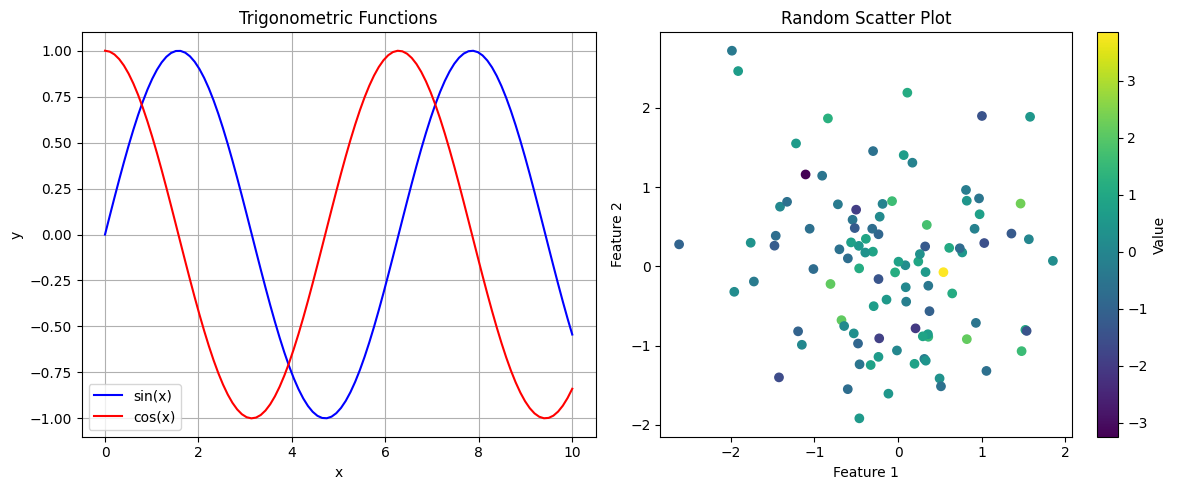


Logged: analysis_plot.png
This plot will appear in the 'Artifacts' tab of your MLflow run!


In [4]:
# Start an MLflow run to group all our artifacts together
# run_name helps you identify this run in the UI
mlflow.start_run(run_name="artifact-demo")

print("="*60)
print("[1] Creating and Logging a Plot")
print("="*60)

# Create a figure with 2 subplots side by side
# figsize=(12, 5) means 12 inches wide, 5 inches tall
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Left Plot: Line Chart ----
# Create 100 evenly spaced points from 0 to 10
x = np.linspace(0, 10, 100)

# Plot sine and cosine waves
axes[0].plot(x, np.sin(x), label="sin(x)", color='blue')
axes[0].plot(x, np.cos(x), label="cos(x)", color='red')
axes[0].set_title("Trigonometric Functions")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()  # Show the legend with labels
axes[0].grid(True)  # Add a grid for better readability

# ---- Right Plot: Scatter Chart ----
# Set random seed for reproducibility
np.random.seed(42)

# Create a scatter plot with random data
# c=... colors each point based on a third random value
# cmap='viridis' uses a nice color gradient
scatter = axes[1].scatter(
    np.random.randn(100),  # 100 random x values
    np.random.randn(100),  # 100 random y values
    c=np.random.randn(100),  # Color based on random values
    cmap='viridis'
)
axes[1].set_title("Random Scatter Plot")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
plt.colorbar(scatter, ax=axes[1], label="Value")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot to a file
plot_path = f"{TEMP_DIR}/analysis_plot.png"
fig.savefig(plot_path, dpi=100, bbox_inches="tight")
plt.show()  # Display in notebook
plt.close()  # Close to free memory

# Log the plot file to MLflow
mlflow.log_artifact(plot_path)

print(f"\nLogged: analysis_plot.png")
print("This plot will appear in the 'Artifacts' tab of your MLflow run!")

### 4.2 Log a CSV Data File

CSV files are useful for logging:
- Training data samples
- Prediction results
- Feature importance rankings
- Any tabular data you want to preserve

In [5]:
print("\n" + "="*60)
print("[2] Creating and Logging a CSV File")
print("="*60)

# Create a sample DataFrame with random data
# This simulates a dataset with 3 features and 1 target variable
df = pd.DataFrame({
    "feature_1": np.random.randn(100),  # 100 random values from normal distribution
    "feature_2": np.random.randn(100),
    "feature_3": np.random.randn(100),
    "target": np.random.choice([0, 1, 2], 100)  # Random class labels (0, 1, or 2)
})

# Display first few rows
print("\nSample data (first 5 rows):")
print(df.head())

# Save DataFrame to CSV file
csv_path = f"{TEMP_DIR}/sample_data.csv"
df.to_csv(csv_path, index=False)  # index=False: don't save row numbers

# Log the CSV file to MLflow
mlflow.log_artifact(csv_path)

print(f"\nLogged: sample_data.csv ({len(df)} rows, {len(df.columns)} columns)")
print("You can download this file from the MLflow UI!")


[2] Creating and Logging a CSV File

Sample data (first 5 rows):
   feature_1  feature_2  feature_3  target
0  -0.828995  -1.594428   0.926178       2
1  -0.560181  -0.599375   1.909417       0
2   0.747294   0.005244  -1.398568       1
3   0.610370   0.046981   0.562969       2
4  -0.020902  -0.450065  -0.650643       2

Logged: sample_data.csv (100 rows, 4 columns)
You can download this file from the MLflow UI!


### 4.3 Log a JSON Configuration File

JSON files are perfect for saving:
- Model configurations
- Preprocessing settings
- Experiment parameters
- Any structured configuration data

In [6]:
print("\n" + "="*60)
print("[3] Creating and Logging a JSON Config")
print("="*60)

# Create a configuration dictionary
# This is a nested structure with model, preprocessing, and training settings
config = {
    "model": {
        "type": "RandomForest",
        "n_estimators": 100,  # Number of trees in the forest
        "max_depth": 10       # Maximum depth of each tree
    },
    "preprocessing": {
        "normalize": True,
        "handle_missing": "mean",  # How to handle missing values
        "features": ["feature_1", "feature_2", "feature_3"]
    },
    "training": {
        "test_size": 0.2,      # 20% of data for testing
        "random_state": 42,   # Seed for reproducibility
        "cv_folds": 5         # Number of cross-validation folds
    }
}

# Display the config
print("\nConfiguration:")
print(json.dumps(config, indent=2))  # Pretty print the JSON

# Save config to JSON file
json_path = f"{TEMP_DIR}/config.json"
with open(json_path, "w") as f:
    json.dump(config, f, indent=2)  # indent=2 makes it human-readable

# Log the JSON file to MLflow
mlflow.log_artifact(json_path)

print(f"\nLogged: config.json")
print("This preserves your exact experiment configuration!")


[3] Creating and Logging a JSON Config

Configuration:
{
  "model": {
    "type": "RandomForest",
    "n_estimators": 100,
    "max_depth": 10
  },
  "preprocessing": {
    "normalize": true,
    "handle_missing": "mean",
    "features": [
      "feature_1",
      "feature_2",
      "feature_3"
    ]
  },
  "training": {
    "test_size": 0.2,
    "random_state": 42,
    "cv_folds": 5
  }
}

Logged: config.json
This preserves your exact experiment configuration!


### 4.4 Log a Text File with Notes

Text files are useful for:
- Experiment notes and observations
- README files
- Log files
- Any plain text documentation

In [7]:
print("\n" + "="*60)
print("[4] Creating and Logging Text Notes")
print("="*60)

# Create a text file with experiment notes
notes_path = f"{TEMP_DIR}/experiment_notes.txt"

# Open file in write mode and add content
with open(notes_path, "w") as f:
    f.write("Experiment Notes\n")
    f.write("=" * 40 + "\n\n")
    f.write("Date: 2024-01-15\n")
    f.write("Author: Data Science Team\n\n")
    f.write("Observations:\n")
    f.write("- Model converged after 50 epochs\n")
    f.write("- Feature 2 shows high importance\n")
    f.write("- No overfitting detected\n\n")
    f.write("Next Steps:\n")
    f.write("- Try different hyperparameters\n")
    f.write("- Add more features\n")

# Read and display the notes
with open(notes_path, "r") as f:
    print("\nNotes content:")
    print(f.read())

# Log the text file to MLflow
mlflow.log_artifact(notes_path)

print(f"Logged: experiment_notes.txt")
print("Great for documenting your experiments!")


[4] Creating and Logging Text Notes

Notes content:
Experiment Notes

Date: 2024-01-15
Author: Data Science Team

Observations:
- Model converged after 50 epochs
- Feature 2 shows high importance
- No overfitting detected

Next Steps:
- Try different hyperparameters
- Add more features

Logged: experiment_notes.txt
Great for documenting your experiments!


### 4.5 Log Multiple Files in a Directory

Sometimes you want to log multiple related files together. Use `mlflow.log_artifacts()` (note the plural 's') to log an entire directory.

**Difference:**
- `log_artifact(path)` - Logs a single file
- `log_artifacts(dir, artifact_path)` - Logs all files in a directory to a subfolder

In [14]:
print("\n" + "="*60)
print("[5] Creating and Logging a Directory")
print("="*60)

# Create a subdirectory for reports
reports_dir = f"{TEMP_DIR}/reports"
os.makedirs(reports_dir, exist_ok=True)

# Create 3 report files
print("\nCreating report files:")
for i in range(3):
    report_path = f"{reports_dir}/report_{i+1}.txt"
    with open(report_path, "w") as f:
        f.write(f"Report {i+1}\n")
        f.write("-" * 20 + "\n")
        f.write(f"Accuracy: {0.85 + i*0.03:.2f}\n")  # Simulated accuracy
        f.write(f"Loss: {0.15 - i*0.02:.2f}\n")       # Simulated loss
    print(f"  - Created: report_{i+1}.txt")

# Log all files in the directory at once
# artifact_path="reports" creates a subfolder in MLflow artifacts
mlflow.log_artifacts(reports_dir, artifact_path="reports")

print(f"\nLogged: reports/ directory (3 files)")
print("All files will appear under 'reports/' folder in MLflow!")


[5] Creating and Logging a Directory

Creating report files:
  - Created: report_1.txt
  - Created: report_2.txt
  - Created: report_3.txt

Logged: reports/ directory (3 files)
All files will appear under 'reports/' folder in MLflow!


### 4.6 Log a Binary (Pickle) File

Pickle files are used to save Python objects (like model weights, preprocessors, or any Python data structure) in binary format.

In [9]:
print("\n" + "="*60)
print("[6] Creating and Logging a Pickle File")
print("="*60)

# Create sample model data (simulating model weights)
model_data = {
    "weights": np.random.randn(10, 5),  # 10x5 matrix of weights
    "bias": np.random.randn(5)           # 5 bias values
}

print(f"\nModel weights shape: {model_data['weights'].shape}")
print(f"Bias shape: {model_data['bias'].shape}")

# Save to pickle file
pickle_path = f"{TEMP_DIR}/model_weights.pkl"
with open(pickle_path, "wb") as f:  # "wb" = write binary
    pickle.dump(model_data, f)

# Log the pickle file to MLflow
mlflow.log_artifact(pickle_path)

print(f"\nLogged: model_weights.pkl")
print("Binary files preserve exact Python objects!")


[6] Creating and Logging a Pickle File

Model weights shape: (10, 5)
Bias shape: (5,)

Logged: model_weights.pkl
Binary files preserve exact Python objects!


### 4.7 Log Some Metrics and End the Run

Let's also log a metric and parameter to complete our run, then end it properly.

In [10]:
print("\n" + "="*60)
print("[7] Logging Metrics and Ending Run")
print("="*60)

# Log a sample metric (numerical performance value)
mlflow.log_metric("accuracy", 0.92)
print("Logged metric: accuracy = 0.92")

# Log a parameter (configuration value)
mlflow.log_param("experiment_type", "artifact_demo")
print("Logged param: experiment_type = artifact_demo")

# End the run
mlflow.end_run()

print("\nMLflow run completed!")


[7] Logging Metrics and Ending Run
Logged metric: accuracy = 0.92
Logged param: experiment_type = artifact_demo
🏃 View run artifact-demo at: http://localhost:5000/#/experiments/13/runs/010d11bbf48e4a5cab551021d2fd37b5
🧪 View experiment at: http://localhost:5000/#/experiments/13

MLflow run completed!


## Step 5: Clean Up Temporary Files

Now that all artifacts are safely stored in MLflow, we can clean up our temporary directory.

In [15]:
# Remove the temporary directory and all its contents
shutil.rmtree(TEMP_DIR)

print(f"Cleaned up: {TEMP_DIR}/ directory removed")
print("\nAll artifacts are now safely stored in MLflow!")

Cleaned up: temp_artifacts/ directory removed

All artifacts are now safely stored in MLflow!


## Summary: Artifact Types and When to Use Them

| Artifact Type | File Extension | Use Case |
|--------------|----------------|----------|
| **Plots** | .png, .pdf | Visualizations, charts, graphs |
| **CSV** | .csv | Data tables, predictions, feature rankings |
| **JSON** | .json | Configurations, settings, structured data |
| **Text** | .txt | Notes, logs, documentation |
| **Pickle** | .pkl | Python objects, model weights |
| **Directories** | folder/ | Multiple related files |

### Key Functions

```python
# Log a single file
mlflow.log_artifact("path/to/file.png")

# Log all files in a directory
mlflow.log_artifacts("path/to/dir", artifact_path="subfolder_name")
```

### Next Steps
1. Open MLflow UI and find the 'artifact-demo' run
2. Click on the 'Artifacts' tab to view all logged files
3. Try downloading some artifacts to verify they're stored correctly

In [12]:
print("Artifact Logging Tutorial Complete!")
print(f"\nView all experiments: {TRACKING_URI}")
print("\nWhat you learned:")
print("  1. How to log plots (.png)")
print("  2. How to log data files (.csv)")
print("  3. How to log configurations (.json)")
print("  4. How to log text notes (.txt)")
print("  5. How to log directories (multiple files)")
print("  6. How to log binary files (.pkl)")
print("\nClick on the run and go to 'Artifacts' tab to see all files!")

Artifact Logging Tutorial Complete!

View all experiments: http://localhost:5000

What you learned:
  1. How to log plots (.png)
  2. How to log data files (.csv)
  3. How to log configurations (.json)
  4. How to log text notes (.txt)
  5. How to log directories (multiple files)
  6. How to log binary files (.pkl)

Click on the run and go to 'Artifacts' tab to see all files!
